In [136]:
import os
import h5py
import numba
import numpy as np
import pandas as pd
import scipy.integrate
import matplotlib as mpl
import matplotlib.pyplot as plt
from hoki.utils.exceptions import HokiFormatError
from pylab import cm
from scipy.optimize import fminbound
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator, ScalarFormatter

In [143]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 18})
plt.rcParams['axes.linewidth'] = 2

In [144]:
models = {
    'empmodel': '/Users/dillon/Desktop/empmodel_170_100_split.h5',
    'harikane22': '/Users/dillon/Desktop/harikane22_135_100_split.h5',
    'MD': '/Users/dillon/Desktop/MD_170_100_split.h5',
    'Millimillennium': '/Users/dillon/Desktop/millimillennium_170_100_split.h5',
    'EAGLE': '/Users/dillon/Desktop/EAGLE_100_100_split.h5',
    'TNG': '/Users/dillon/Desktop/TNG_135_300_split.h5'
}

model_files = {}

for model_name, model_path in models.items():
    model_files[model_name] = h5py.File(model_path, "r")

    globals()[f'Ia_{model_name}'] = np.sum(model_files[model_name]['Ia_rates'], axis=0)
    globals()[f'CCSN_{model_name}'] = np.sum(np.sum(model_files[model_name]['CCSN_rates'], axis=1), axis=0)
    globals()[f'LGRB_{model_name}'] = np.sum(model_files[model_name]['LGRB_rates'], axis=0)
    globals()[f'PISN_{model_name}'] = np.sum(model_files[model_name]['PISN_rates'], axis=0)
    
    for i in range(model_files[model_name]['CCSN_rates'].shape[1]):
        globals()[f'CCSN_{i+1}_{model_name}'] = np.sum(model_files[model_name]['CCSN_rates'][:, i, :], axis=0)

    globals()[f'total_rates_{model_name}'] = (
        globals()[f'Ia_{model_name}'] +
        globals()[f'CCSN_{model_name}'] +
        globals()[f'LGRB_{model_name}'] +
        globals()[f'PISN_{model_name}']
    )


<ipython-input-186-2cf03d9e977d>:28: RuntimeWarning: invalid value encountered in true_divide
  ax.step(TNG['redshift_edges'][:-1], CCSN_1_TNG/total_rates_TNG)
<ipython-input-186-2cf03d9e977d>:29: RuntimeWarning: invalid value encountered in true_divide
  ax.step(TNG['redshift_edges'][:-1], CCSN_2_TNG/total_rates_TNG)
<ipython-input-186-2cf03d9e977d>:30: RuntimeWarning: invalid value encountered in true_divide
  ax.step(TNG['redshift_edges'][:-1], CCSN_3_TNG/total_rates_TNG)
<ipython-input-186-2cf03d9e977d>:31: RuntimeWarning: invalid value encountered in true_divide
  ax.step(TNG['redshift_edges'][:-1], CCSN_4_TNG/total_rates_TNG)
<ipython-input-186-2cf03d9e977d>:32: RuntimeWarning: invalid value encountered in true_divide
  ax.step(TNG['redshift_edges'][:-1], LGRB_TNG/total_rates_TNG)
<ipython-input-186-2cf03d9e977d>:33: RuntimeWarning: invalid value encountered in true_divide
  ax.step(TNG['redshift_edges'][:-1], PISN_TNG/total_rates_TNG)
<ipython-input-186-2cf03d9e977d>:64: Runtime

Text(0.51, 0.01, 'Redshift')

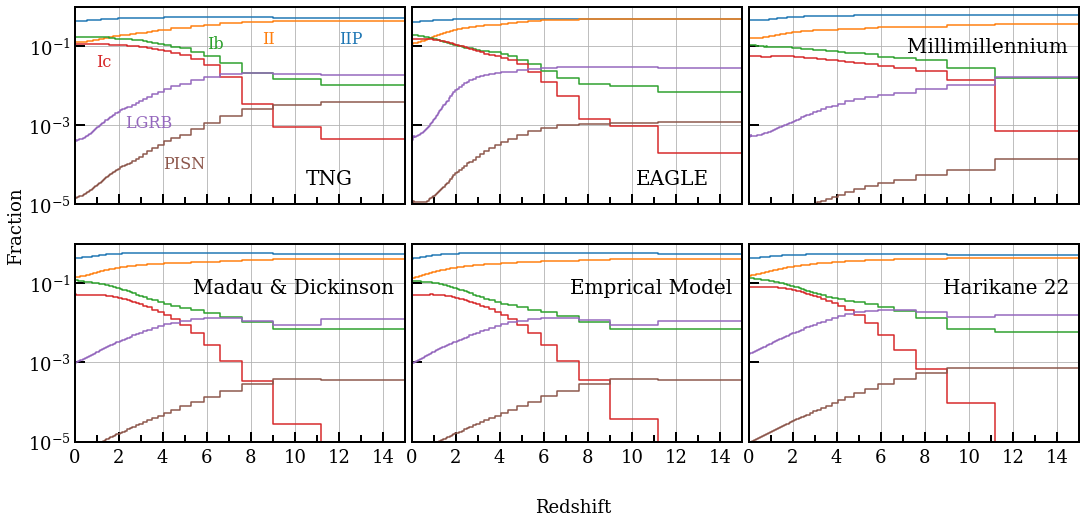

In [186]:
fig, axes = plt.subplots(2,3, figsize=(18,8))
fig.subplots_adjust(wspace=0.02)

axs = axes.flatten()


for ax in axs:
    ax.grid()
    ax.set_yscale('log')
    ax.set_xlim(0, 15)
    ax.set_ylim(1e-5,1e0)
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in')
    ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', pad=7)
    ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
    ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=5))
    major_locator = ticker.MultipleLocator(base=2)
    minor_locator = ticker.MultipleLocator(base=1)
    ax.xaxis.set_major_locator(major_locator)
    ax.xaxis.set_minor_locator(minor_locator)
    ax.set_xticks(ax.get_xticks()[1:-1])
    ax.set_xticklabels([str(int(x)) for x in ax.get_xticks()])


    
    
for ax in axs[0:1]:
    ax.step(TNG['redshift_edges'][:-1], CCSN_1_TNG/total_rates_TNG)
    ax.step(TNG['redshift_edges'][:-1], CCSN_2_TNG/total_rates_TNG)
    ax.step(TNG['redshift_edges'][:-1], CCSN_3_TNG/total_rates_TNG)
    ax.step(TNG['redshift_edges'][:-1], CCSN_4_TNG/total_rates_TNG)
    ax.step(TNG['redshift_edges'][:-1], LGRB_TNG/total_rates_TNG)
    ax.step(TNG['redshift_edges'][:-1], PISN_TNG/total_rates_TNG)
    
    ax.text(0.7, 0.1, "TNG", transform=ax.transAxes,fontsize=20)
    
    ax.text(6, 9e-2, "Ib", color = 'C2', fontsize=16)
    ax.text(1, 3e-2, "Ic", color = 'C3', fontsize=16)
    ax.text(8.5, 1.2e-1, "II", color = 'C1', fontsize=16)
    ax.text(12, 1.2e-1, "IIP", color = 'C0', fontsize=16)
    ax.text(2.3, 8.8e-4, "LGRB", color = 'C4', fontsize = 16)
    ax.text(4, 8e-5, "PISN", color = 'C5', fontsize = 16)
    
    ax.xaxis.set_major_formatter(mpl.ticker.NullFormatter())
    ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    
for ax in axs[1:2]:
    ax.step(EAGLE['redshift_edges'][:-1], CCSN_1_EAGLE/total_rates_EAGLE)
    ax.step(EAGLE['redshift_edges'][:-1], CCSN_2_EAGLE/total_rates_EAGLE)
    ax.step(EAGLE['redshift_edges'][:-1], CCSN_3_EAGLE/total_rates_EAGLE)
    ax.step(EAGLE['redshift_edges'][:-1], CCSN_4_EAGLE/total_rates_EAGLE)
    ax.step(EAGLE['redshift_edges'][:-1], LGRB_EAGLE/total_rates_EAGLE)
    ax.step(EAGLE['redshift_edges'][:-1], PISN_EAGLE/total_rates_EAGLE)
    ax.text(0.68, 0.1, "EAGLE", transform=ax.transAxes,fontsize=20)
    
    ax.xaxis.set_major_formatter(mpl.ticker.NullFormatter())
    ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())

    ax.yaxis.set_major_formatter(mpl.ticker.NullFormatter())
    ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    
    
for ax in axs[2:3]:
    ax.step(Millimillennium['redshift_edges'][:-1], CCSN_1_Millimillennium/total_rates_Millimillennium)
    ax.step(Millimillennium['redshift_edges'][:-1], CCSN_2_Millimillennium/total_rates_Millimillennium)
    ax.step(Millimillennium['redshift_edges'][:-1], CCSN_3_Millimillennium/total_rates_Millimillennium)
    ax.step(Millimillennium['redshift_edges'][:-1], CCSN_4_Millimillennium/total_rates_Millimillennium)
    ax.step(Millimillennium['redshift_edges'][:-1], LGRB_Millimillennium/total_rates_Millimillennium)
    ax.step(Millimillennium['redshift_edges'][:-1], PISN_Millimillennium/total_rates_Millimillennium)
    ax.text(0.48, 0.77, "Millimillennium", transform=ax.transAxes,fontsize=20)
    
    ax.xaxis.set_major_formatter(mpl.ticker.NullFormatter())
    ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())

    ax.yaxis.set_major_formatter(mpl.ticker.NullFormatter())
    ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    
    
for ax in axs[3:4]:
    ax.step(MD['redshift_edges'][:-1], CCSN_1_MD/total_rates_MD)
    ax.step(MD['redshift_edges'][:-1], CCSN_2_MD/total_rates_MD)
    ax.step(MD['redshift_edges'][:-1], CCSN_3_MD/total_rates_MD)
    ax.step(MD['redshift_edges'][:-1], CCSN_4_MD/total_rates_MD)
    ax.step(MD['redshift_edges'][:-1], LGRB_MD/total_rates_MD)
    ax.step(MD['redshift_edges'][:-1], PISN_MD/total_rates_MD)
    ax.text(0.36, 0.75, "Madau & Dickinson", transform=ax.transAxes,fontsize=20)
    

for ax in axs[4:5]:
    ax.step(empmodel['redshift_edges'][:-1], CCSN_1_empmodel/total_rates_empmodel)
    ax.step(empmodel['redshift_edges'][:-1], CCSN_2_empmodel/total_rates_empmodel)
    ax.step(empmodel['redshift_edges'][:-1], CCSN_3_empmodel/total_rates_empmodel)
    ax.step(empmodel['redshift_edges'][:-1], CCSN_4_empmodel/total_rates_empmodel)
    ax.step(empmodel['redshift_edges'][:-1], LGRB_empmodel/total_rates_empmodel)
    ax.step(empmodel['redshift_edges'][:-1], PISN_empmodel/total_rates_empmodel)
    ax.text(0.48, 0.75, "Emprical Model", transform=ax.transAxes,fontsize=20)
    
    ax.yaxis.set_major_formatter(mpl.ticker.NullFormatter())
    ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    
    
for ax in axs[5:6]:
    ax.step(harikane22['redshift_edges'][:-1], CCSN_1_harikane22/total_rates_harikane22)
    ax.step(harikane22['redshift_edges'][:-1], CCSN_2_harikane22/total_rates_harikane22)
    ax.step(harikane22['redshift_edges'][:-1], CCSN_3_harikane22/total_rates_harikane22)
    ax.step(harikane22['redshift_edges'][:-1], CCSN_4_harikane22/total_rates_harikane22)
    ax.step(harikane22['redshift_edges'][:-1], LGRB_harikane22/total_rates_harikane22)
    ax.step(harikane22['redshift_edges'][:-1], PISN_harikane22/total_rates_harikane22)
    ax.text(0.59, 0.75, "Harikane 22", transform=ax.transAxes,fontsize=20)
    
    ax.yaxis.set_major_formatter(mpl.ticker.NullFormatter())
    ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    

fig.text(0.08, 0.5, "Fraction", ha="center", va="center", rotation="vertical")
fig.text(0.51, 0.01, "Redshift", ha="center", va="center")
   